In [7]:

from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


Content
As per WHO,

Cancer is the second leading cause of death globally, and is responsible for an estimated 9.6 million deaths in 2018. Globally, about 1 in 6 deaths is due to cancer.
Approximately 70% of deaths from cancer occur in low- and middle-income countries.
Around one third of deaths from cancer are due to the 5 leading behavioral and dietary risks: high body mass index, low fruit and vegetable intake, lack of physical activity, tobacco use, and alcohol use.


Problem Statement
Many aspects of the behaviour of cancer disease are highly unpredictable. Even with the huge number of studies that have been done on the DNA mutation responsible for the disease, we are still unable to use these information at clinical level. However, it is important that we understand the effects and impacts of this disease from the past information as much as we possibly can.

Objective

You are required to build a machine learning  model that would predict the cancer death rate for the given year.

Evaluation Criteria
Submissions are evaluated using Mean Squared Error (MSE).

About the data
The data is collected from cancer.gov and the US Census American Community Survey. There are 34 columns including the target column. Some of the columns are listed below:

TARGET_deathRate: Dependent variable. Mean per capita (100,000) cancer mortalities(a)
avgAnnCount: Mean number of reported cases of cancer diagnosed annually(a)
avgDeathsPerYear: Mean number of reported mortalities due to cancer(a)
incidenceRate: Mean per capita (100,000) cancer diagoses(a)
medianIncome: Median income per county (b)
popEst2015: Population of county (b)
povertyPercent: Percent of populace in poverty (b)
studyPerCap: Per capita number of cancer-related clinical trials per county (a)
binnedInc: Median income per capita binned by decile (b)
MedianAge: Median age of county residents (b)
MedianAgeMale: Median age of male county residents (b)
MedianAgeFemale: Median age of female county residents (b)
Geography: County name (b)
AvgHouseholdSize: Mean household size of county (b)
PercentMarried: Percent of county residents who are married (b)
PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school (b)
PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma (b)
PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college (b)
PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree (b)
PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma (b)
PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree (b)
PctEmployed16_Over: Percent of county residents ages 16 and over employed (b)
PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed (b)
PctPrivateCoverage: Percent of county residents with private health coverage (b)
PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance) (b)
PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage (b)
PctPublicCoverage: Percent of county residents with government-provided health coverage (b)
PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone (b)
PctWhite: Percent of county residents who identify as White (b)
PctBlack: Percent of county residents who identify as Black (b)
PctAsian: Percent of county residents who identify as Asian (b)
PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian (b)
PctMarriedHouseholds: Percent of married households (b)
BirthRate: Number of live births relative to number of women in county (b)
(a): years 2010-2016

(b): 2013 Census Estimates

In [1]:
import pandas as pd 
cancer_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/cancer_death_rate/Training_set_label.csv" )

In [2]:
#load test data
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/cancer_death_rate/Testing_set_label.csv')

In [3]:
cancer_data.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
0,19.0,8,481.5,50038,2704,11.1,0.0,"(48021.6, 51046.4]",48.4,49.6,46.4,"Hettinger County, North Dakota",2.25,65.9,10.8,25.0,57.4,6.8,37.1,12.2,57.4,1.1,81.2,56.0,35.7,34.7,9.9,96.032049,0.724914,0.000000,0.000000,62.511457,15.157116,160.3
1,88.0,34,486.0,59399,14844,9.7,0.0,"(54545.6, 61494.5]",41.9,41.3,43.2,"Mills County, Iowa",2.63,58.6,22.3,29.1,NaN,1.1,35.9,16.0,60.4,3.8,76.7,NaN,50.8,32.1,12.8,97.537344,0.719957,0.080743,0.040371,61.641045,3.293510,194.9
2,195.0,83,475.7,39721,25164,18.5,0.0,"(37413.8, 40362.7]",48.9,47.9,49.9,"Gladwin County, Michigan",2.30,57.2,24.9,36.2,NaN,3.5,40.2,7.6,41.2,11.0,61.6,NaN,32.1,49.8,21.6,97.576566,0.360770,0.411749,0.082350,53.978102,6.390328,196.5
3,116.0,55,496.6,30299,17917,28.1,0.0,"[22640, 34218.1]",44.2,42.7,45.2,"Fentress County, Tennessee",2.43,53.0,10.9,51.8,NaN,5.3,44.2,7.0,41.6,10.4,45.2,NaN,24.2,53.2,33.0,97.908650,0.161731,0.306731,0.340193,51.013143,5.124836,230.9
4,80.0,35,372.0,39625,14058,17.4,0.0,"(37413.8, 40362.7]",45.0,42.2,48.0,"Las Animas County, Colorado",2.36,52.2,12.6,31.2,NaN,0.2,28.3,10.5,49.3,9.2,56.6,NaN,33.4,43.0,24.7,82.672551,1.834103,0.682617,8.253465,50.566426,3.897033,162.2


In [4]:
cancer_data.shape

(3051, 34)

In [8]:
cancer_data.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2266
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     604
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOtherRace                  0
PctMarri

In [9]:
cancer_data.Geography.value_counts()

Garrard County, Kentucky         2
Jackson County, West Virginia    2
Hamblen County, Tennessee        2
Hoke County, North Carolina      2
Burleigh County, North Dakota    2
                                ..
Placer County, California        1
Cumberland County, Virginia      1
Dallam County, Texas             1
Cherokee County, Oklahoma        1
Todd County, Minnesota           1
Name: Geography, Length: 2285, dtype: int64

In [12]:
# the columns Geography and PctSomeCol18_24 are not providing suffcient info view large no of cat with few values
# and large no of missing values
cancer_data.drop(columns=['Geography','PctSomeCol18_24'],axis=1,inplace=True)

In [13]:
# we also create a new columns pop_to_avgdeath
cancer_data['pop_to_avgdeath'] = cancer_data['popEst2015']/cancer_data['avgDeathsPerYear']

In [14]:
#drop orginal columns
cancer_data.drop(columns=['popEst2015','avgDeathsPerYear'],axis=1,inplace=True)

In [15]:
#lets do simlar processing on test data as well
test_data['pop_to_avgdeath'] = test_data['popEst2015']/test_data['avgDeathsPerYear']
test_data.drop(columns=['Geography','PctSomeCol18_24','popEst2015','avgDeathsPerYear'],axis=1,inplace=True)

In [20]:
# set up
from pycaret.regression import *
exp_reg = setup(data = cancer_data, target = 'TARGET_deathRate', session_id=123,normalize=True,normalize_method='zscore',
                transformation = True,remove_outliers = True,
                transform_target = True)

,Description,Value
0,session_id,123
1,Target,TARGET_deathRate
2,Original Data,"(3051, 31)"
3,Missing Values,True
4,Numeric Features,29
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(2028, 39)"


In [21]:
best_model = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,6.4941,89.2273,9.4344,0.8680,0.0548,0.0374,8.402
lightgbm,Light Gradient Boosting Machine,6.9466,99.0855,9.9466,0.8535,0.0570,0.0397,0.359
xgboost,Extreme Gradient Boosting,6.7598,112.0116,10.5784,0.8346,0.0614,0.0391,2.808
et,Extra Trees Regressor,6.6337,114.2600,10.6542,0.8319,0.0617,0.0384,1.194
rf,Random Forest Regressor,7.7667,122.6327,11.0609,0.8191,0.0636,0.0447,2.554
gbr,Gradient Boosting Regressor,8.4009,125.6353,11.2014,0.8141,0.0642,0.0481,0.967
huber,Huber Regressor,8.7560,141.4272,11.8333,0.7923,0.0679,0.0502,0.094
lr,Linear Regression,8.8092,141.3877,11.8401,0.7922,0.0679,0.0504,0.329
ridge,Ridge Regression,8.8054,141.3447,11.8384,0.7922,0.0678,0.0504,0.021
br,Bayesian Ridge,8.7990,141.3232,11.8378,0.7922,0.0678,0.0503,0.025


In [22]:
models_to_select = ['catboost','lightgbm','xgboost']

In [23]:
catboost = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,6.6293,101.4896,10.0742,0.8439,0.0558,0.0371
1,6.3160,79.3909,8.9102,0.8823,0.0510,0.0362
2,6.3469,85.8890,9.2676,0.8798,0.0546,0.0371
3,6.8399,98.0966,9.9044,0.8636,0.0591,0.0398
4,6.9658,101.7879,10.0890,0.8524,0.0586,0.0398
5,6.1940,79.7641,8.9311,0.8872,0.0506,0.0351
6,6.7415,92.0902,9.5964,0.8393,0.0574,0.0394
7,6.6623,92.3945,9.6122,0.8703,0.0549,0.0379
8,6.1104,76.5443,8.7490,0.8643,0.0527,0.0359
9,6.1345,84.8261,9.2101,0.8970,0.0534,0.0355


In [24]:
light = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,6.8677,111.3517,10.5523,0.8287,0.0586,0.0382
1,7.2573,107.3988,10.3633,0.8408,0.0575,0.0414
2,6.8075,92.9305,9.6400,0.8699,0.0568,0.0396
3,7.2650,103.2013,10.1588,0.8565,0.0591,0.0418
4,7.4427,109.1133,10.4457,0.8418,0.0593,0.0422
5,6.8218,91.9233,9.5877,0.8700,0.0539,0.0385
6,6.8129,93.7008,9.6799,0.8365,0.0570,0.0395
7,6.9114,99.1381,9.9568,0.8609,0.0557,0.0390
8,6.7930,87.8512,9.3729,0.8442,0.0558,0.0393
9,6.4868,94.2458,9.7080,0.8855,0.0565,0.0379


In [25]:
xgb = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,6.5210,109.1188,10.4460,0.8322,0.0581,0.0365
1,6.4991,109.9874,10.4875,0.8370,0.0599,0.0378
2,6.4682,106.9785,10.3430,0.8502,0.0609,0.0379
3,7.1937,120.2056,10.9638,0.8329,0.0650,0.0419
4,7.5015,128.7422,11.3465,0.8133,0.0657,0.0431
5,6.7484,107.1692,10.3523,0.8484,0.0589,0.0388
6,6.5315,105.6714,10.2797,0.8156,0.0609,0.0381
7,7.0403,113.2037,10.6397,0.8411,0.0620,0.0404
8,6.8139,104.8480,10.2395,0.8141,0.0606,0.0397
9,6.2806,114.1916,10.6860,0.8613,0.0620,0.0368


In [26]:
tuned_cat = tune_model(catboost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,9.2306,162.0880,12.7314,0.7507,0.0706,0.0516
1,9.4965,174.8412,13.2228,0.7408,0.0736,0.0544
2,9.4007,149.2443,12.2166,0.7911,0.0712,0.0545
3,9.0523,149.0092,12.2069,0.7928,0.0723,0.0530
4,9.0996,163.0398,12.7687,0.7636,0.0733,0.0520
5,8.8732,176.7188,13.2936,0.7500,0.0706,0.0487
6,9.1335,142.3392,11.9306,0.7516,0.0699,0.0532
7,9.5767,154.4336,12.4271,0.7833,0.0710,0.0547
8,8.8790,131.2415,11.4561,0.7673,0.0672,0.0518
9,9.3799,156.1743,12.4970,0.8103,0.0736,0.0551


In [29]:
import numpy as np
lgbm_params = {'num_leaves': np.arange(10,200,10),
                        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                        'learning_rate': np.arange(0.1,1,0.1)
                        }
tuned_light = tune_model(light,custom_grid = lgbm_params)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,6.6053,111.6645,10.5671,0.8282,0.0592,0.0370
1,6.6536,104.1422,10.2050,0.8456,0.0562,0.0381
2,6.4537,96.7737,9.8374,0.8645,0.0584,0.0380
3,6.8832,97.1329,9.8556,0.8650,0.0574,0.0398
4,7.1733,113.4239,10.6501,0.8355,0.0610,0.0409
5,6.5788,103.5953,10.1782,0.8534,0.0559,0.0370
6,6.1293,91.8239,9.5825,0.8397,0.0560,0.0354
7,6.7663,99.8241,9.9912,0.8599,0.0564,0.0384
8,6.4990,91.1507,9.5473,0.8384,0.0563,0.0375
9,6.0364,93.7917,9.6846,0.8861,0.0568,0.0355


In [28]:
tuned_xgb = tune_model(xgb)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,7.6290,128.5678,11.3388,0.8022,0.0631,0.0427
1,7.0243,98.8812,9.9439,0.8534,0.0574,0.0407
2,7.2993,102.0238,10.1007,0.8572,0.0604,0.0427
3,8.2994,121.5994,11.0272,0.8309,0.0645,0.0478
4,7.9489,124.0271,11.1367,0.8201,0.0649,0.0455
5,7.5545,110.5353,10.5136,0.8436,0.0595,0.0428
6,7.5319,106.7094,10.3300,0.8138,0.0609,0.0436
7,7.8607,115.0719,10.7272,0.8385,0.0607,0.0442
8,7.0415,97.4334,9.8708,0.8272,0.0596,0.0410
9,7.2091,108.8858,10.4348,0.8677,0.0618,0.0419


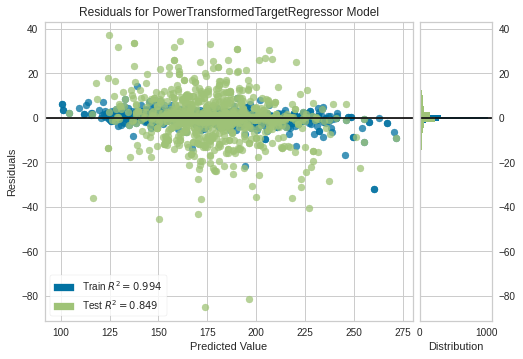

In [30]:
#residual plot
# we find the lightgbm model gives best cv results
plot_model(tuned_light)

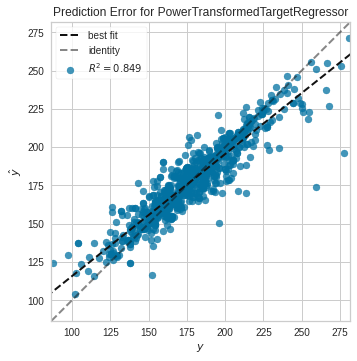

In [31]:
#Prediction Error Plot
plot_model(tuned_light, plot = 'error')

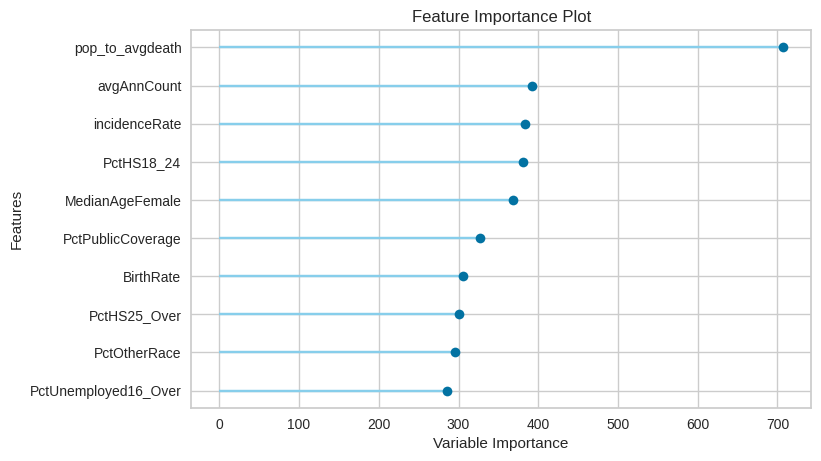

In [33]:
#Feature Importance Plot
plot_model(tuned_light, plot='feature')


In [36]:
#predict on unseen test data
unseen_predictions = predict_model(tuned_light, data=test_data)
unseen_predictions.head()

,avgAnnCount,incidenceRate,medIncome,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,pop_to_avgdeath,Label
0,2092.000000,341.000000,34368,33.5,42.739913,"(34218.1, 37413.8]",28.8,27.4,30.1,3.62,51.0,22.3,29.0,5.1,23.2,11.9,52.2,9.9,32.6,NaN,22.9,37.3,28.2,91.409724,0.620104,1.041848,5.804689,56.335344,6.825886,1103.937090,129.553805
1,94.000000,445.200000,35615,21.5,0.000000,"(34218.1, 37413.8]",41.5,40.9,42.1,2.68,52.0,9.8,36.1,8.3,47.1,7.9,46.5,9.0,55.6,40.1,36.5,44.8,26.4,96.844181,0.836770,0.376547,0.029885,55.288859,2.292861,407.414634,191.499223
2,126.000000,425.700000,76672,7.6,31.100330,"(61494.5, 125635]",35.0,34.2,36.0,2.44,55.8,13.0,26.8,10.0,30.5,17.5,71.4,2.8,83.3,68.0,55.9,19.6,5.9,92.626100,1.114294,1.257510,1.844348,52.614465,10.502567,747.767442,162.961431
3,1962.667684,453.549422,45856,11.4,0.000000,"(45201, 48021.6]",44.7,44.2,45.5,2.29,60.5,33.2,13.9,7.6,35.3,15.5,63.1,4.3,75.8,55.3,44.5,33.4,15.5,96.855117,0.381749,0.181785,0.163607,55.044700,9.342231,339.250000,159.693685
4,1962.667684,453.549422,53739,10.9,0.000000,"(51046.4, 54545.6]",535.2,44.7,44.4,2.07,55.9,25.2,31.1,3.0,29.7,15.5,67.9,2.4,78.2,56.7,48.6,29.2,11.2,98.327360,0.358423,0.000000,0.000000,47.826087,10.029499,417.500000,162.864364


In [37]:
# extract Label column from prediction and assign it to result_df
col_result = list(unseen_predictions['Label'].values)
result_df = pd.DataFrame({'prediction':col_result})

In [38]:
result_df.head()
#tuned_light_gbm gave a MSE of 207

,prediction
0,129.553805
1,191.499223
2,162.961431
3,159.693685
4,162.864364


In [39]:
#download csv file which is prediction dataframe
from google.colab import files
result_df.to_csv('assignment3_cancer_pycaret.csv',index=False)
files.download('assignment3_cancer_pycaret.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [41]:
# as another iteration using catboost without hyperparameter tuning 
#predict on unseen test data
unseen_predictions = predict_model(catboost, data=test_data)
col_result = list(unseen_predictions['Label'].values)
result_df = pd.DataFrame({'prediction':col_result})
result_df.head(3)
# this model gave a score in dphi datathon(bootcamp beginner track cancer data) of MSE=176(ranked first)

,prediction
0,138.422820
1,194.671783
2,159.529234


In [42]:
#writing the dataframe on to a csv file and download
from google.colab import files
result_df.to_csv('assignment3_cancer_pyc_cb.csv',index=False)
files.download('assignment3_cancer_pyc_cb.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>